O Objetivo aqui é apresentar ferramentas de interpretabilidade dos resultados dos modelos de predição.

São apresentadas duas formas de interpretação:

1.   Interpretação de um modelo simples, no caso uma Árvore de Decisão
2.   Interpretação de um modelo complexo, conhecidos como Black Box, no caso o Gradient Boosting Classifier



In [ ]:
# Importação das bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Carregamento dos dados
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()

In [ ]:
# Definição das Variáveis Independentes e da Variável Dependente para o Modelo

X = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
y = pd.Series(data=dataset.target,)

In [ ]:
# Separando a base de dados em treino 70% e teste 30%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Criação e treinamento do modelo (Será utilizado o modelo de Árvore de Decisão para Classificação - se o câncer é "Benigno" ou "Maligno")

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=5) # O hiperparâmetro max_depth=5 limita profundidade da árvore, com uma quantidade de regras menor, facilitando a interpretabilidade
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [ ]:
# Validação do modelo no conjunto de teste
y_predict = model.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93        63
           1       0.96      0.95      0.96       108

    accuracy                           0.95       171
   macro avg       0.94      0.95      0.94       171
weighted avg       0.95      0.95      0.95       171



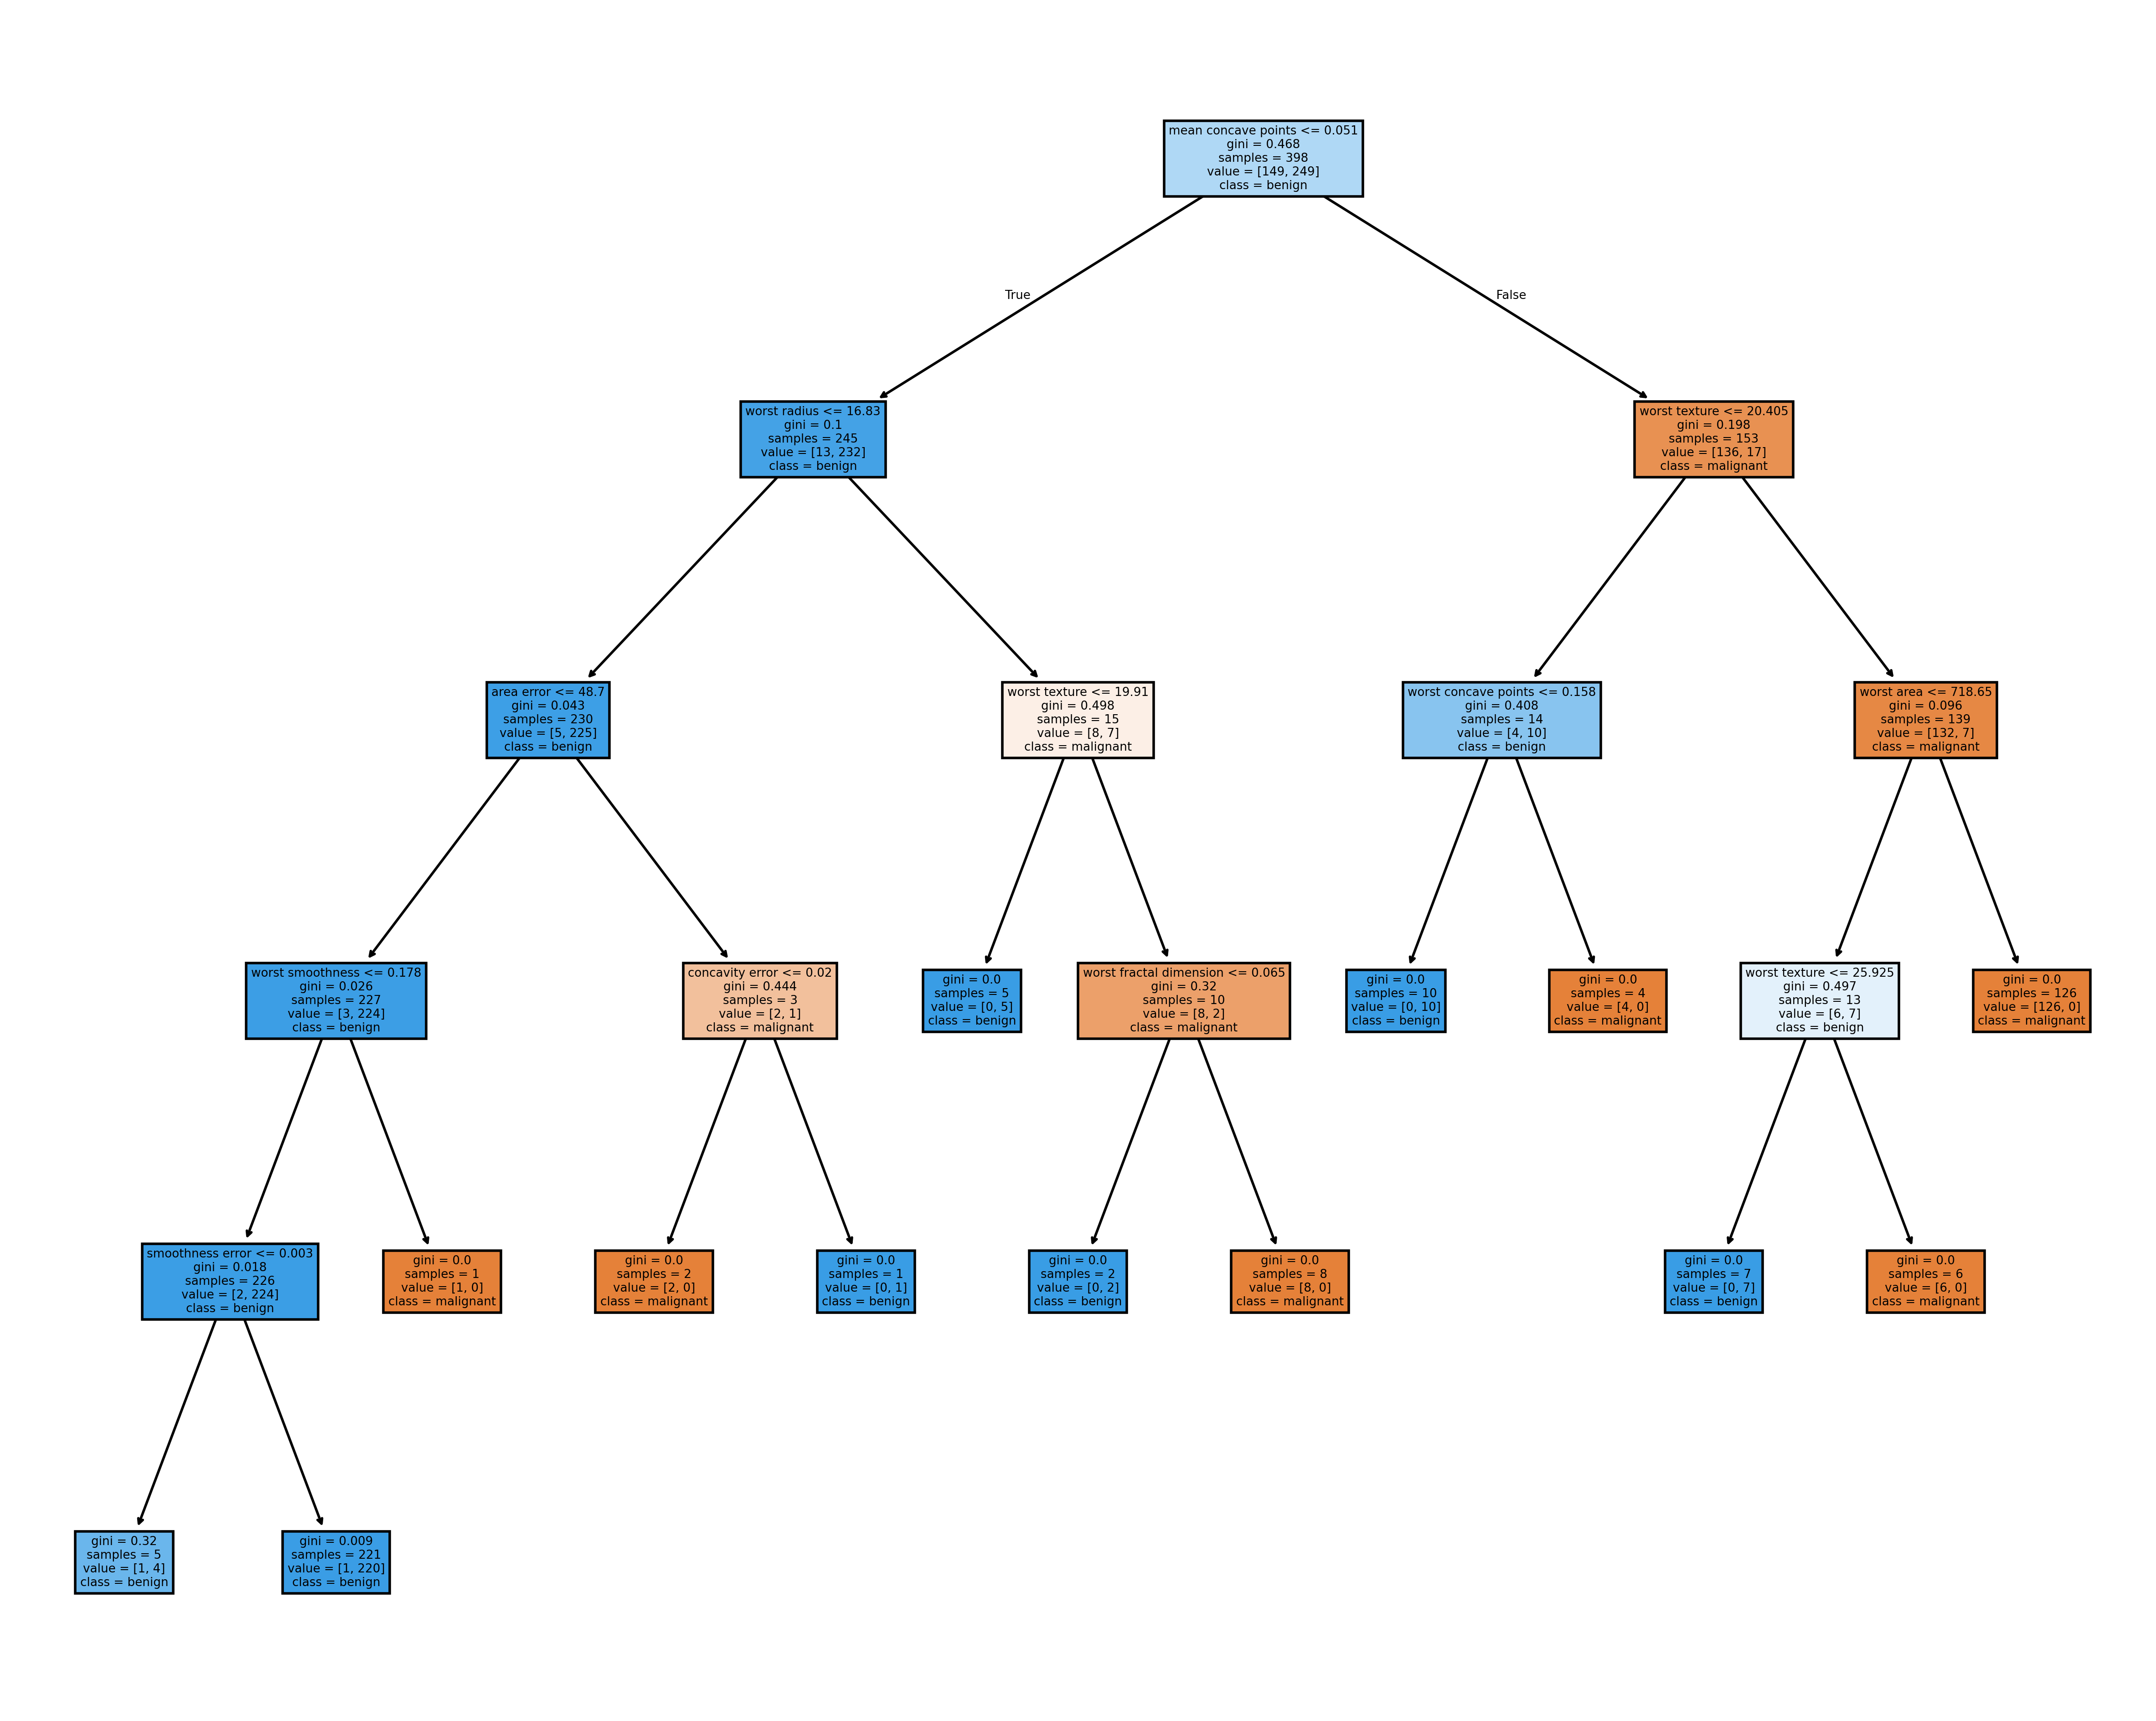

In [ ]:
# Interepretação do Modelo de Árvore
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 12), dpi=400)
plot_tree(model, filled=True, feature_names=X.columns, class_names=dataset.target_names)
plt.show()

Com base neste plot da árvore, é possível interpretar o que foi feito pelo modelo, para se chegar a uma classificação final, de se o câncer é "Benigno" ou "Maligno", com base nas váriaveis do dataset

# Interpretabilidade de um Modelo Black Box - Técnica Post-Hoc

Para intepretar o modelo caixa preta, será utilizada a técnica SHAP (SHapley Additive exPlanations), que se trata de uma técnica baseada na Teoria dos Jogos e é agnóstica ao modelo, ou seja, ela pode ser aplicada tanto em modelos simples como Regressão Linear quanto em modelos complexos, como por exemplo o modelo de Rede Neural.
A técnica SHAP pode ser utilizada para avaliar de forma local (gera explicação apenas a avaliação de um único indivíduo) ou de forma global (gera uma explicação para o comportamento geral do modelo)

In [ ]:
# O modelo Black Box utilizado neste caso é o GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier

bb_model = GradientBoostingClassifier(random_state=42)
bb_model.fit(X_train, y_train)

y_pred = bb_model.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94        62
           1       0.97      0.96      0.97       109

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



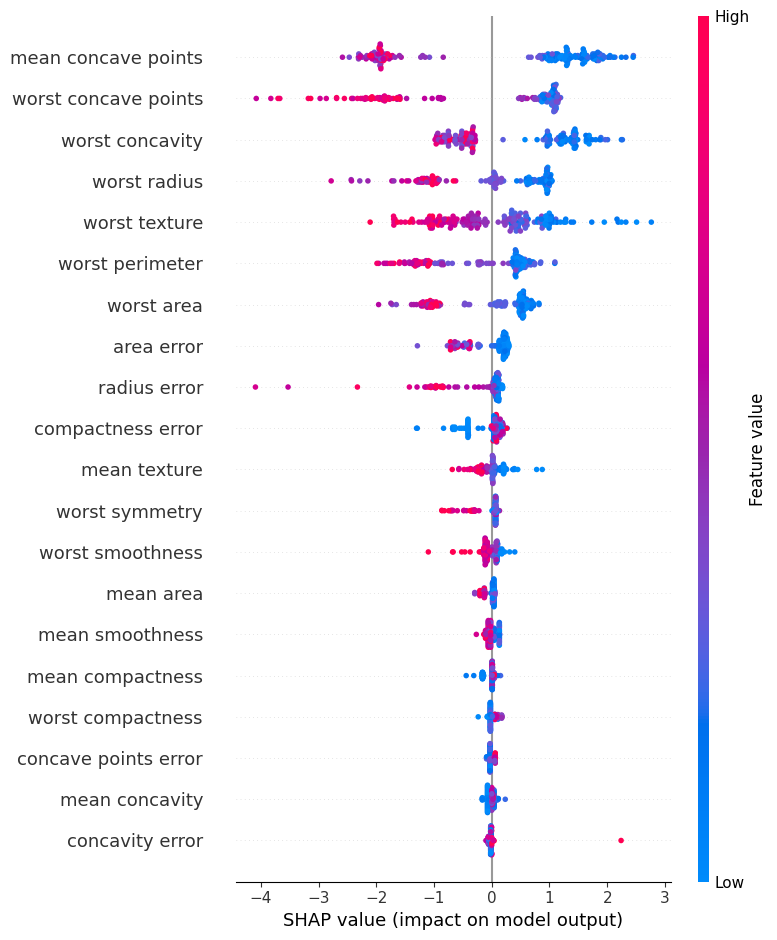

In [ ]:
# Interpretabilidade do modelo Black Box
import shap

explainer = shap.TreeExplainer(bb_model) # Cria um explainer (explicador) para calcular os valores SHAP de um modelo baseado em árvores (como RandomForest, XGBoost, LightGBM, etc.).
shap_values = explainer.shap_values(X_test) # Calcula os valores SHAP para cada amostra em X_test, mostrando como cada feature impactou a previsão do modelo. Gera explicação para os dados de Teste em cima do modelo bb_model treinado.
shap.summary_plot(shap_values, X_test)

O SHAP calcula como os valores de cada feature afetam a previsão do modelo para cada instância.

1.   Ordem das features:
 - A ordem das features estão apresentadas de acordo com o impacto que cada uma tem no modelo.
 - O Atributo mais elevado (mean concave points) teve maior relevância para o modelo

2.   Valor SHAP (eixo X):

- Representa o impacto quantitativo no modelo:
  
  - Quanto mais os pontos dos atributos chegam próximos da extremidade à esquerda ou à direita significa que o atibuto teve um grande impacto no modelo:
  
     **`Positivo (direita): Puxa a previsão para maligno`**

     **` Negativo (esquerda): Puxa para benigno.`**

- Quanto mais afastado do zero, mais forte o efeito.

3.   Cores (valores da feature):

- Escala azul (baixo) → vermelho (alto): Mostra o valor real da feature naquela instância.

  - Ponto vermelho → Valor alto de concave points → Aumenta risco de malignidade.


- Ponto azul → Valor baixo de concave points → Reduz risco de malignidade.

---

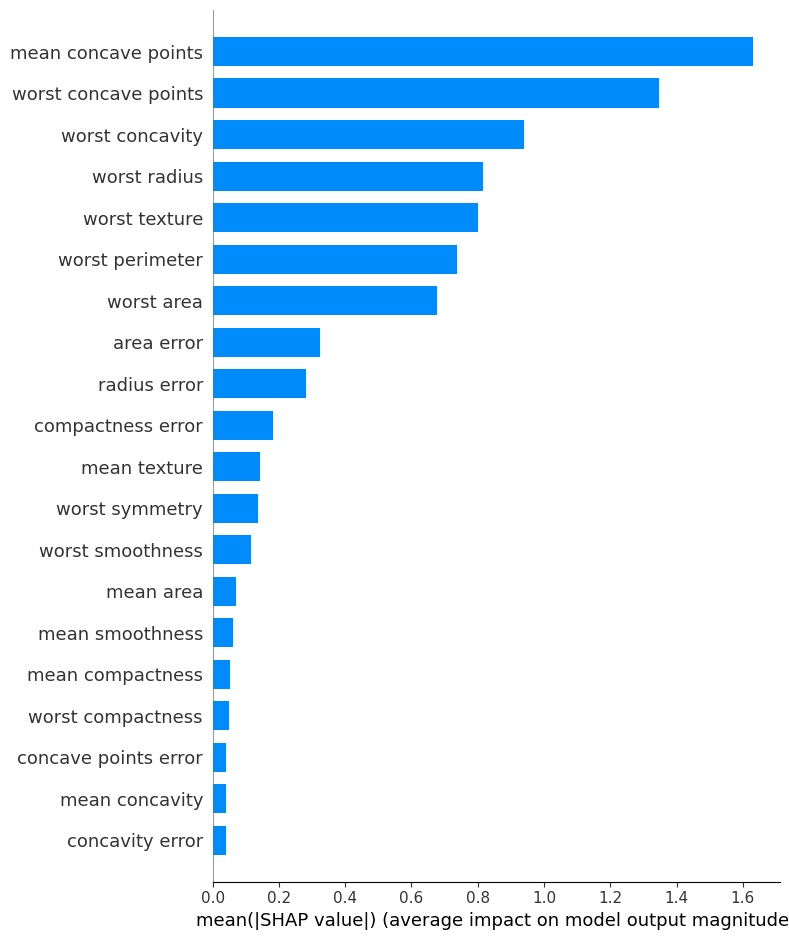

In [ ]:
shap.summary_plot(shap_values, X_test, plot_type="bar") # Verificação da relevância de cada atributo para o modelo

## SHAP Aplicado a um Paciente Específico

In [ ]:
y.value_counts(normalize=True)

,proportion
1,0.627417
0,0.372583


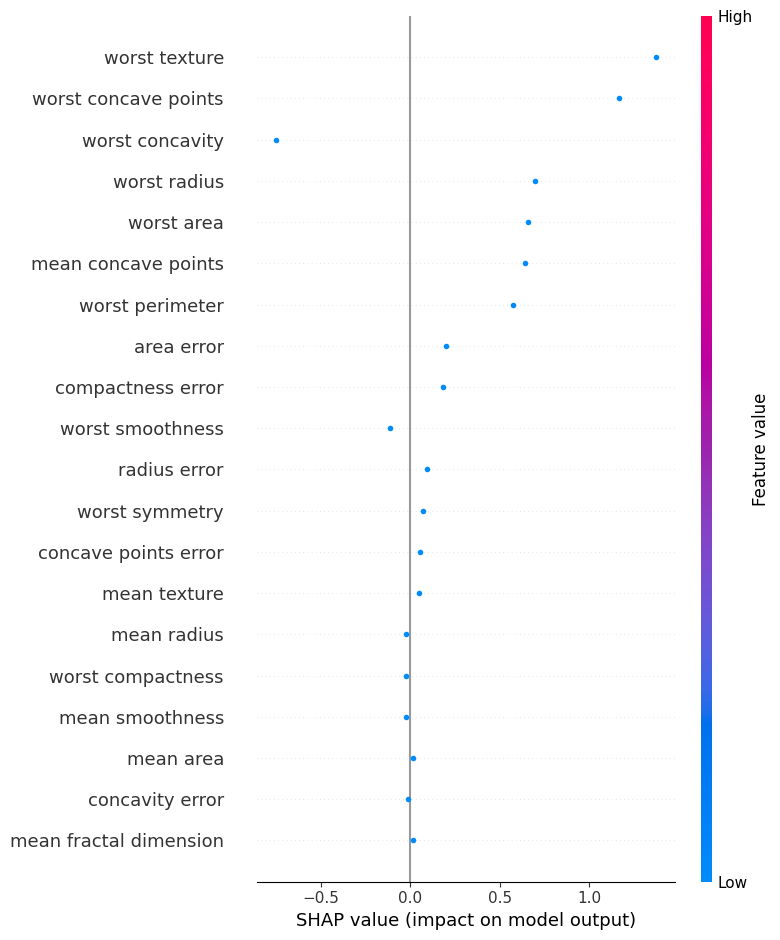

In [ ]:
# Seleção do paciente
paciente = X_test.iloc[[42]] # No caso escolheu-se aleatóriamente uma linha do X de teste

# Calcular SHAP values para essa instância
shap_values_pac = explainer.shap_values(paciente)
shap.summary_plot(shap_values_pac, paciente)

Acima foi apresentado o Gráfico SHAP para um paciente específico, mas a real interpretabilidade das features deve ser realizada de forma técnica por um especialista da área. O intuito aqui é apresentar o SHAP e como ele pode ser utilizado para interpretar o resultado do modelo.